In [4]:
import csv
import random
from datetime import datetime, timedelta

# Function to generate random sales data
def generate_sales_data(num_rows):
    products = ["Laptop", "Smartphone", "Headphones", "Monitor", "Keyboard", "Mouse", "Tablet"]
    payment_methods = ["Credit Card", "Debit Card", "Cash", "Online Payment", "Bank Transfer"]
    cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]
    sales_data = []

    start_date = datetime(2023, 1, 1)
    for _ in range(num_rows):
        date = start_date + timedelta(days=random.randint(0, 365))
        product = random.choice(products)
        city = random.choice(cities)
        quantity = random.randint(1, 20)
        price_per_unit = round(random.uniform(20, 2000), 2)
        total_price = round(quantity * price_per_unit, 2)
        payment_method = random.choice(payment_methods)
        discount = round(random.uniform(0, 0.3) * total_price, 2)  # Discount up to 30%
        final_price = round(total_price - discount, 2)

        sales_data.append([
            date.strftime("%Y-%m-%d"),
            product,
            city,
            quantity,
            price_per_unit,
            total_price,
            payment_method,
            discount,
            final_price
        ])

    return sales_data

# Function to write data to a CSV file
def write_to_csv(file_name, data):
    header = [
        "Date", "Product", "City", "Quantity", "Price per Unit ($)",
        "Total Price ($)", "Payment Method", "Discount ($)", "Final Price ($)"
    ]
    with open(file_name, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(header)
        writer.writerows(data)

# Main script
if __name__ == "__main__":
    num_rows = 5000  # Specify the number of rows to generate
    file_name = "sales_data.csv"

    sales_data = generate_sales_data(num_rows)
    write_to_csv(file_name, sales_data)

    print(f"{num_rows} rows of sales data have been written to '{file_name}'.")


5000 rows of sales data have been written to 'sales_data.csv'.


In [5]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("sales_data.csv")

# Display the first few rows
print(df.head())

# Get basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe())


         Date     Product      City  Quantity  Price per Unit ($)  \
0  2023-07-29       Mouse   Houston        15              972.61   
1  2023-06-05  Smartphone  New York        18             1003.30   
2  2023-07-02     Monitor   Phoenix        14             1309.44   
3  2023-08-01    Keyboard   Chicago        12             1004.61   
4  2023-04-17  Smartphone  New York         2              317.86   

   Total Price ($) Payment Method  Discount ($)  Final Price ($)  
0         14589.15     Debit Card        668.95         13920.20  
1         18059.40  Bank Transfer       5392.65         12666.75  
2         18332.16     Debit Card       2836.93         15495.23  
3         12055.32  Bank Transfer       3511.29          8544.03  
4           635.72           Cash        152.21           483.51  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ---

In [6]:
# Total sales by product
sales_by_product = df.groupby('Product')['Final Price ($)'].sum()
print(sales_by_product)


Product
Headphones    6400725.72
Keyboard      5903235.39
Laptop        6333564.45
Monitor       6312911.94
Mouse         7117425.00
Smartphone    6628379.87
Tablet        5726336.78
Name: Final Price ($), dtype: float64


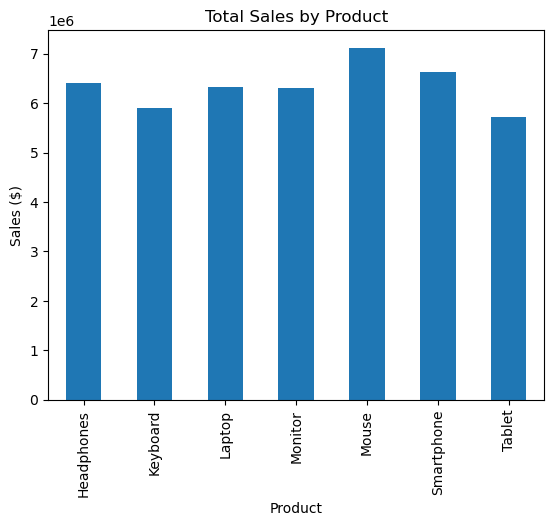

In [7]:
import matplotlib.pyplot as plt

sales_by_product.plot(kind='bar', title="Total Sales by Product")
plt.ylabel("Sales ($)")
plt.show()


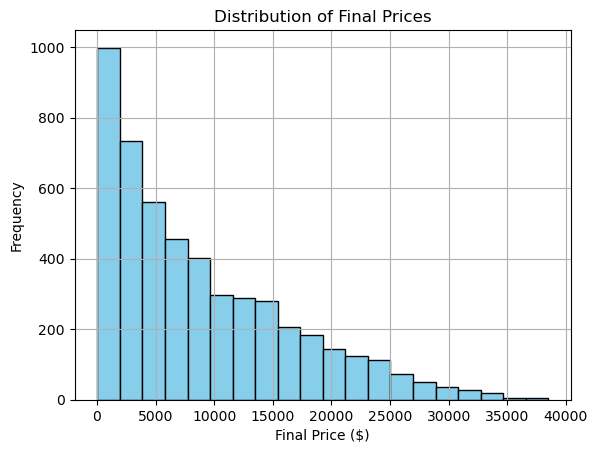

In [8]:
df['Final Price ($)'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Final Prices")
plt.xlabel("Final Price ($)")
plt.ylabel("Frequency")
plt.show()


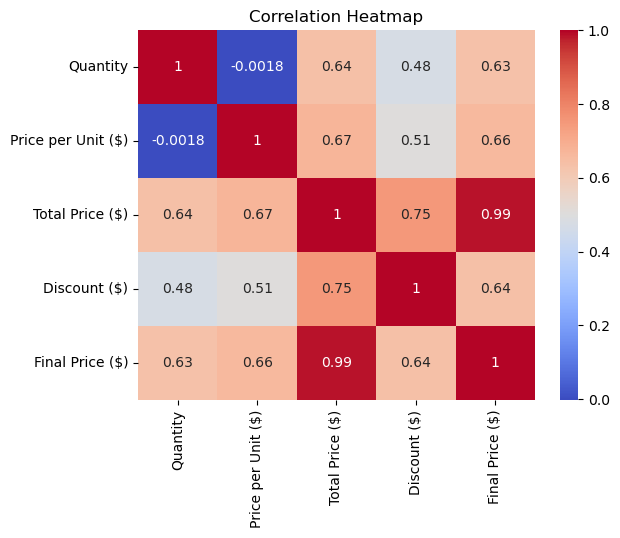

In [9]:
import seaborn as sns

# Correlation matrix
corr = df[['Quantity', 'Price per Unit ($)', 'Total Price ($)', 'Discount ($)', 'Final Price ($)']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
